In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
df = pd.read_excel('ENB2012_data.xlsx')

In [4]:
df.shape

(768, 10)

In [5]:
col_names = {'X1':'Relative_Compactness',
             'X2' : 'Surface_Area',
             'X3' : 'Wall_Area',
             'X4' : 'Roof_Area',
             'X5' : 'Overall_Height',
             'X6' : 'Orientation',
             'X7' : 'Glazing_Area',
             'X8' : 'Glazing_Area_Distribution',
             'Y1' : 'Heating_Load',
             'Y2' : 'Cooling_Load'}

In [6]:
df.rename(columns=col_names, inplace=True)

In [7]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Our target variable is 'Heating Load' and 'Cooling Load' rest are independent variables.

In [10]:
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

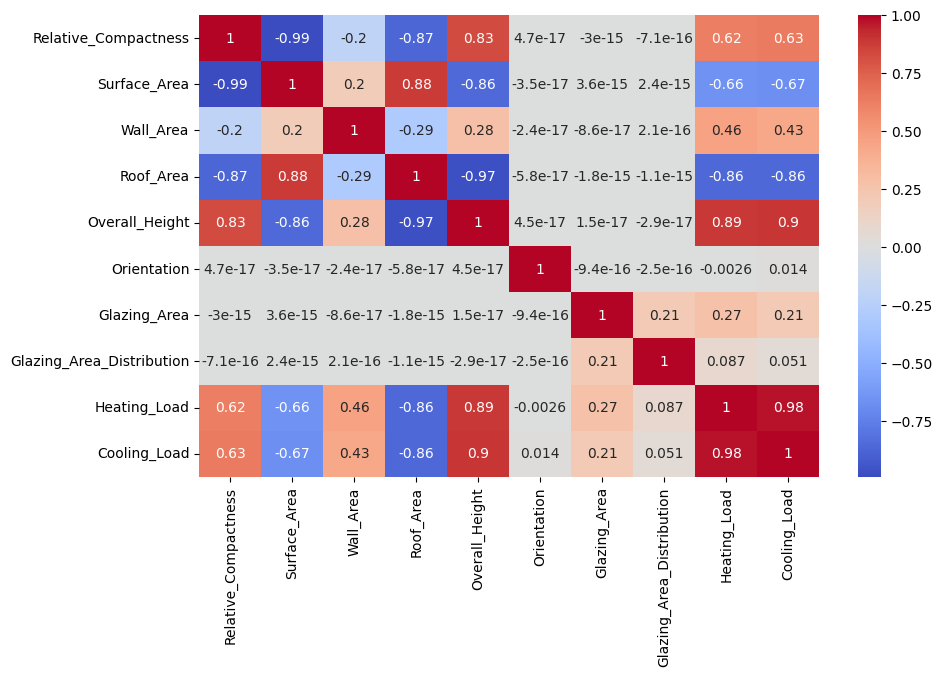

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")
plt.show()

 **Interpretation of the Heatmap**
The heatmap visualizes the correlation between different variables in your energy dataset. Here’s how to interpret it:

1. **Strong Positive Correlations (Close to +1)**  
   - `Heating_Load` and `Cooling_Load` (0.98): These two are almost perfectly correlated, meaning buildings with high heating loads also tend to have high cooling loads.
   - `Overall_Height` and `Heating_Load` (0.89) / `Cooling_Load` (0.90): Taller buildings require more energy for heating and cooling.
   - `Relative_Compactness` and `Heating_Load` (0.62) / `Cooling_Load` (0.63): More compact buildings tend to have higher energy loads.

2. **Strong Negative Correlations (Close to -1)**  
   - `Surface_Area` and `Relative_Compactness` (-0.99): A near-perfect negative correlation means that as a building’s compactness increases, its total surface area decreases.
   - `Roof_Area` and `Overall_Height` (-0.97): Taller buildings typically have smaller roof areas.
   - `Roof_Area` and `Heating_Load` (-0.86) / `Cooling_Load` (-0.86): Buildings with large roofs require less energy for heating and cooling.

3. **Weak/No Correlation (Close to 0)**  
   - `Orientation` has very weak correlations with other variables, suggesting it has little impact on energy loads.
   - `Glazing_Area_Distribution` also has weak correlations, meaning the way glass surfaces are distributed has minimal influence on heating and cooling loads.

---

 **Causation vs. Correlation Analysis**
**Correlation** shows relationships between variables but does not imply one causes the other. To determine **causation**, we need experimental evidence or domain knowledge.

 **Potential Causal Relationships (Based on Physics and Building Science)**
1. **Building Height → Heating & Cooling Load**
   - Taller buildings **cause** higher energy loads due to increased air volume and heat exchange.
   
2. **Surface Area → Heating & Cooling Load**
   - Larger surface areas **cause** more heat loss/gain, increasing energy demand.

3. **Relative Compactness → Energy Efficiency**
   - More compact buildings **cause** reduced energy needs due to less exposed surface area.

4. **Roof Area → Heating & Cooling Load**
   - A larger roof **causes** better heat dissipation in summer but more heat loss in winter.

 **Non-Causal Correlations (No Direct Causality)**
1. **Heating Load and Cooling Load**
   - These are correlated but don’t cause each other. Instead, both depend on insulation, materials, and design.
   
2. **Orientation and Energy Load**
   - Weak correlation suggests that orientation alone does not determine energy consumption. Other factors like insulation and windows play a larger role.

---

Let's build the model now.

We will only use Cooling_load as are target for now and build our model around that.

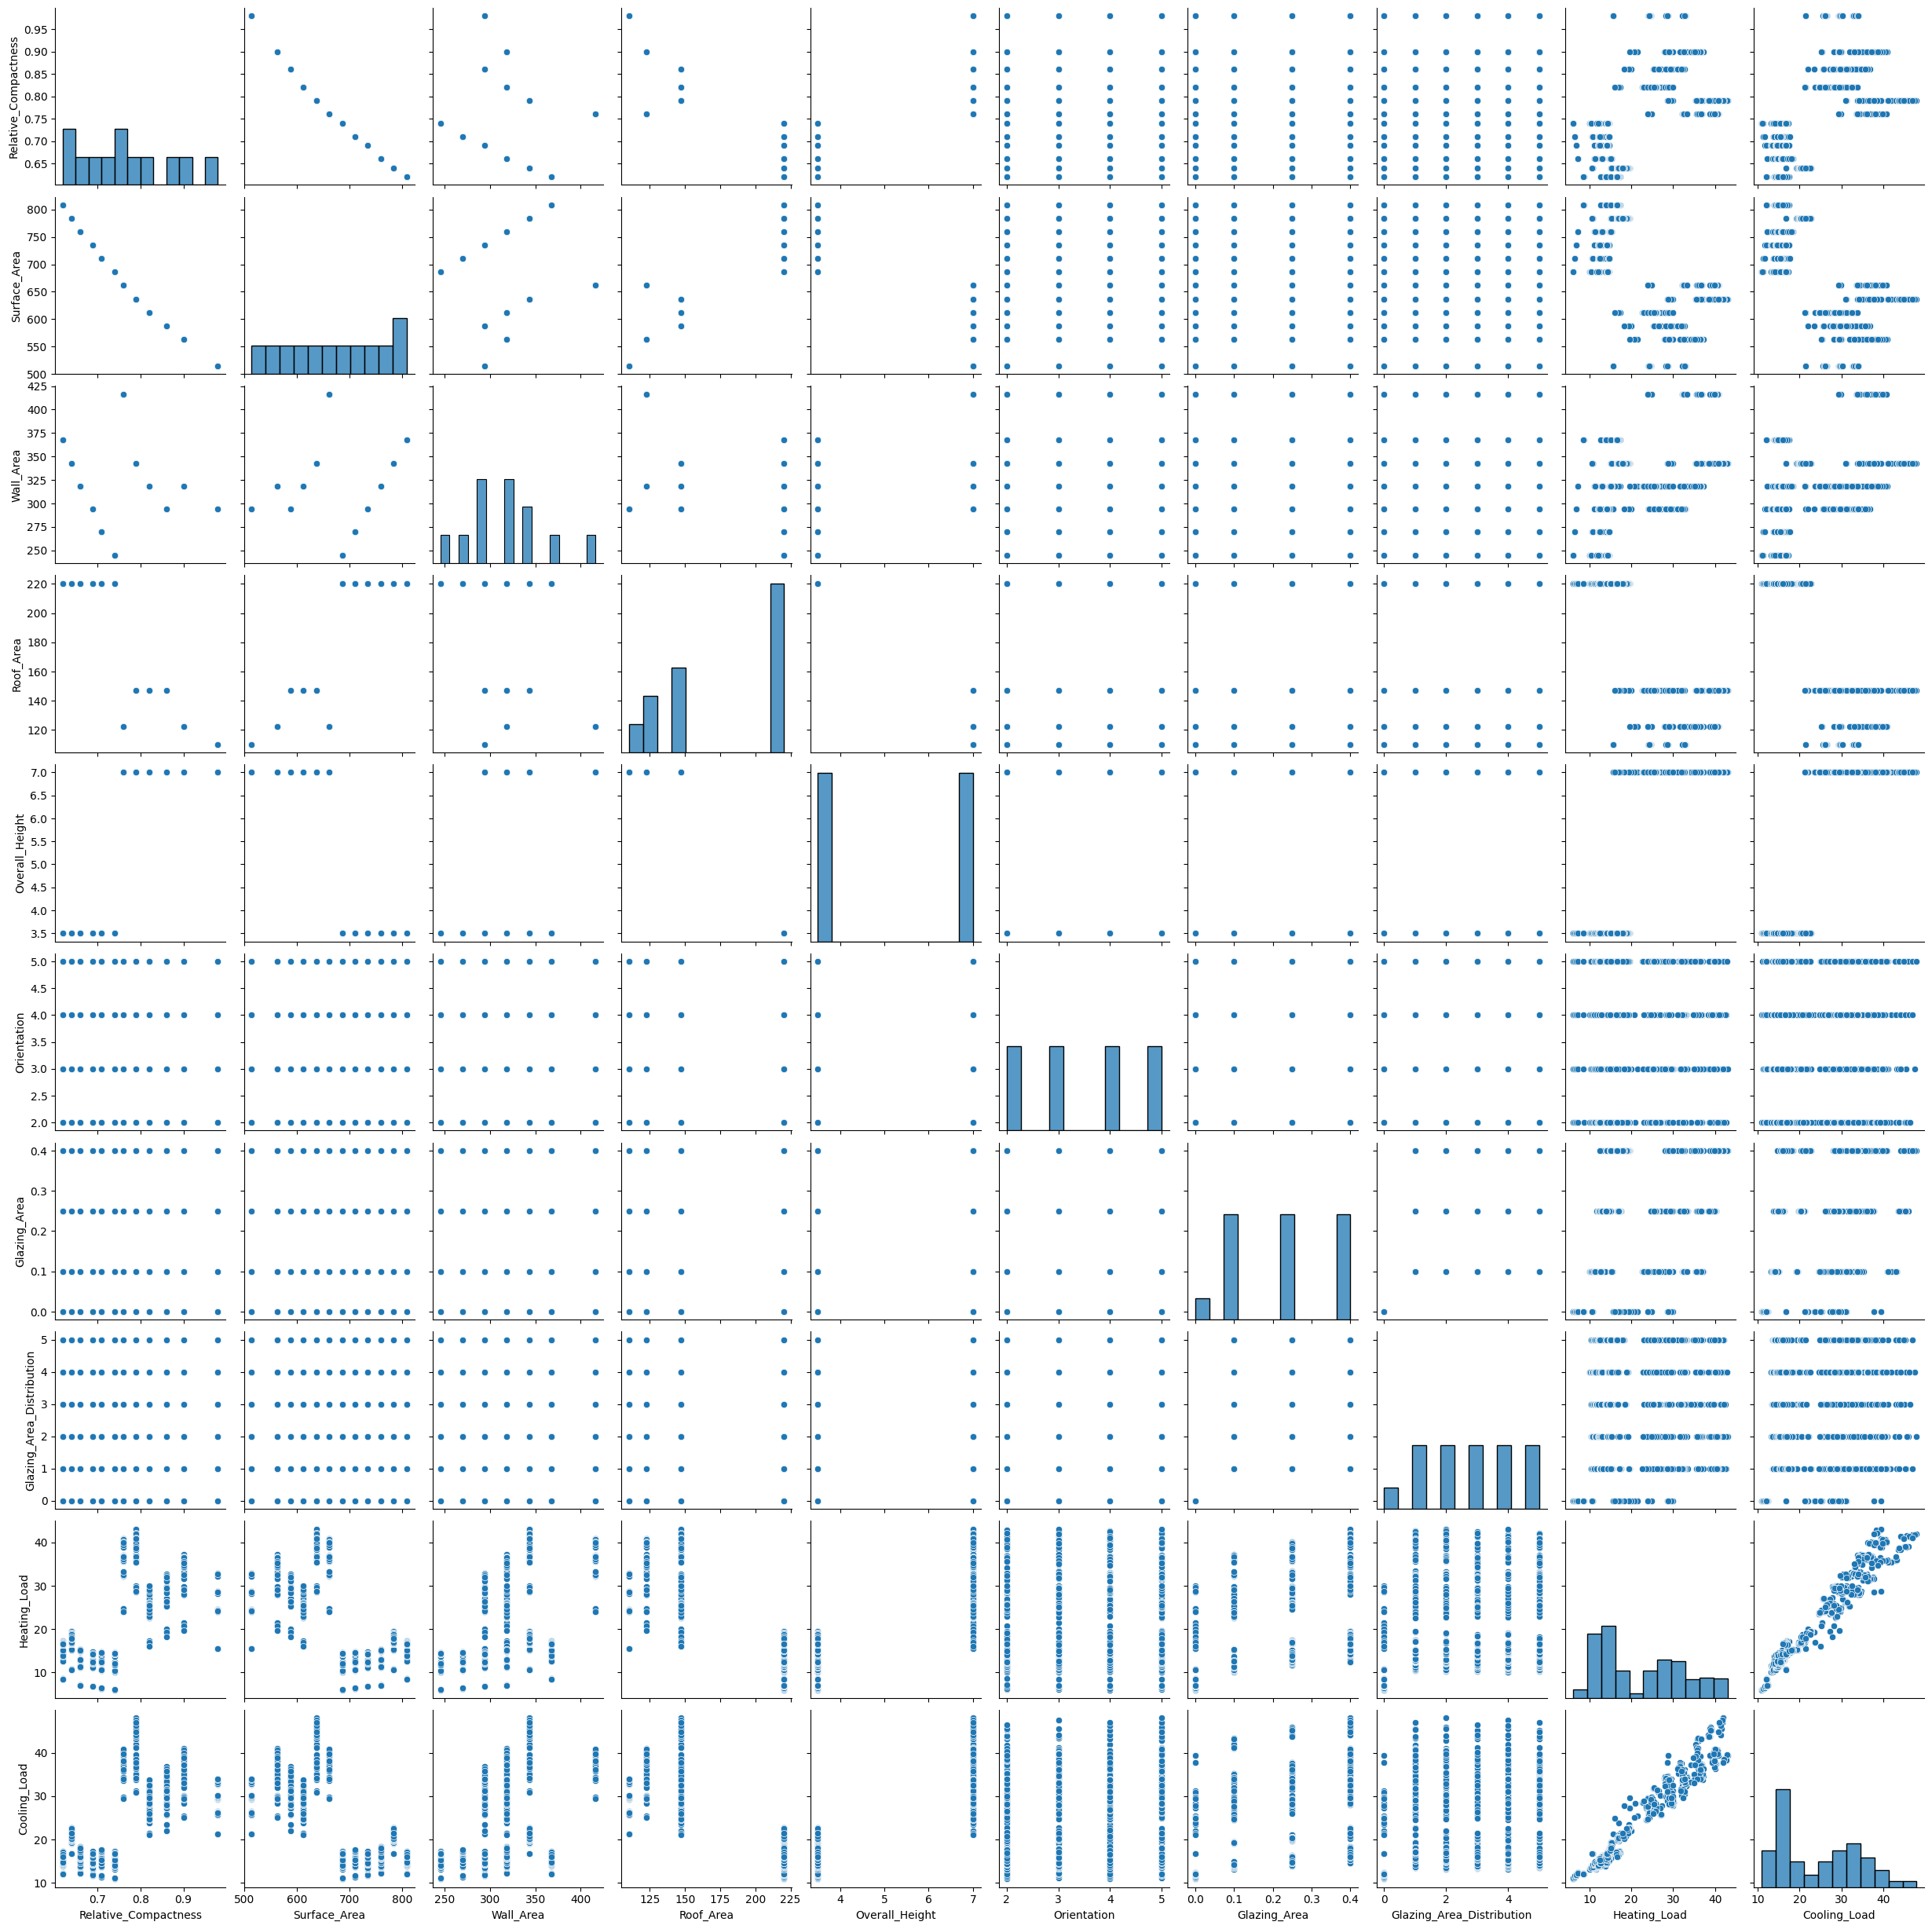

In [12]:
sns.pairplot(df)

In [30]:
X = df.drop(columns=['Heating_Load','Cooling_Load'])
y = df['Cooling_Load']

# y_heat = df['Heating_Load']

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Scores:\n", vif_data)

VIF Scores:
                      Feature         VIF
0       Relative_Compactness  168.948751
1               Surface_Area         inf
2                  Wall_Area         inf
3                  Roof_Area         inf
4             Overall_Height  134.035782
5                Orientation   10.796725
6               Glazing_Area    4.293656
7  Glazing_Area_Distribution    4.496320


/home/puskchan/ML_projects/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [15]:
X_collinear = X.drop(columns=['Surface_Area', 'Relative_Compactness', 'Wall_Area'])

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_collinear.columns
vif_data["VIF"] = [variance_inflation_factor(X_collinear.values, i) for i in range(X_collinear.shape[1])]
print("VIF Scores:\n", vif_data)

VIF Scores:
                      Feature        VIF
0                  Roof_Area   8.516175
1             Overall_Height   6.535844
2                Orientation  10.680472
3               Glazing_Area   4.284329
4  Glazing_Area_Distribution   4.485596


We fixed multicollinearity (almost) and now these features can be used for the regression analysis.

In [17]:
import pandas as pd
import scipy.stats as stats


anova_cl = stats.f_oneway(
    df[df["Orientation"] == 5]["Cooling_Load"],
    df[df["Orientation"] == 2]["Cooling_Load"],
    df[df["Orientation"] == 3]["Cooling_Load"],
    df[df["Orientation"] == 4]["Cooling_Load"]
)

print("ANOVA for Cooling Load:", anova_cl)


ANOVA for Cooling Load: F_onewayResult(statistic=np.float64(0.15607504344702092), pvalue=np.float64(0.9257795007378739))


p > 0.05, fail to reject null → Orientation doesn’t significantly impact Heating/Cooling Load.

In [18]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:28:12   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=37)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

Plotting the results.

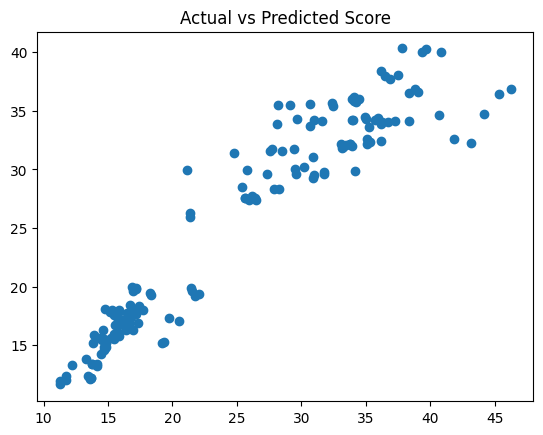

In [22]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Score")
plt.show()

Model Diagnostics and Checklist

1 - Non Linearity

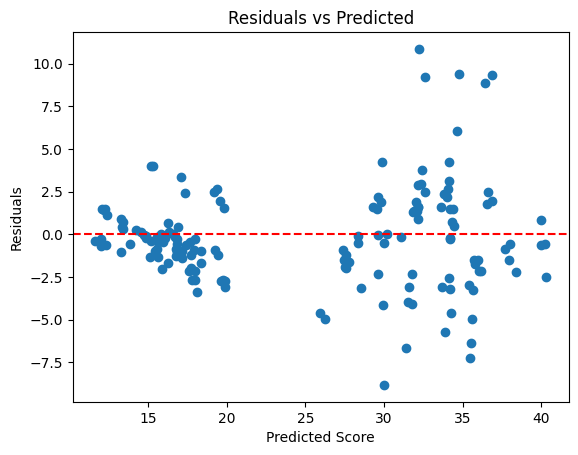

In [23]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

Non-Constant Variance (Homoscedasticity)

In [24]:
from statsmodels.stats.diagnostic import het_breuschpagan

X_test_const = sm.add_constant(X_test)
y = np.ravel(y)
test = het_breuschpagan(residuals, X_test_const)
print("Breusch-Pagan test p-value:", test[1])

Breusch-Pagan test p-value: 1.9504563883684763e-05


As the p-value is less than 0.05 we have heteroscedasticity deceted from our residuals.

Deviation from Normality

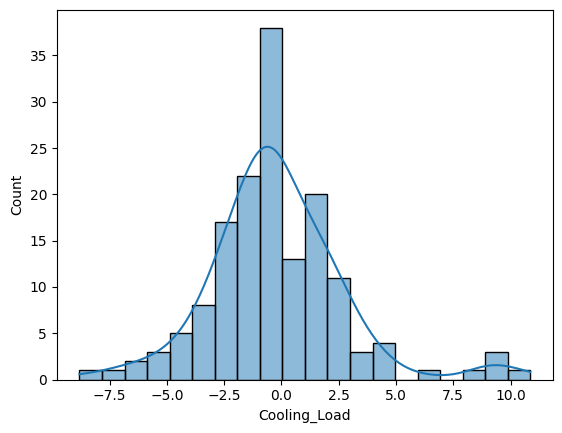

In [25]:
sns.histplot(residuals, bins=20, kde=True)
plt.show()

Autocorrelation

In [26]:
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson statistic:", durbin_watson(residuals))

Durbin-Watson statistic: 2.086403258062456


Outliers

In [27]:
from scipy.stats import zscore

X_test["residuals"] = residuals
X_test["residuals_zscore"] = zscore(X_test["residuals"])
X_test[X_test["residuals_zscore"].abs() > 3]  # Outliers

,const,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,residuals,residuals_zscore
160,1.0,0.79,637.0,343.0,147.0,7.0,2,0.10,3,10.865887,3.759201
544,1.0,0.79,637.0,343.0,147.0,7.0,2,0.40,1,8.871246,3.081019
210,1.0,0.79,637.0,343.0,147.0,7.0,4,0.10,4,9.226577,3.201833
690,1.0,0.79,637.0,343.0,147.0,7.0,4,0.40,4,9.351609,3.244344
450,1.0,0.79,637.0,343.0,147.0,7.0,4,0.25,4,9.404093,3.262188


Missing Predictors

In [28]:
X_test.isnull().sum()

const                        0
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
residuals                    0
residuals_zscore             0
dtype: int64

This was all to prove that this breaks the assumptions of Gauss Markov Theorem and we might have to use a another Point estimator(MLE, Ridge Regression) for our dataset.

Let's try Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_lambda = grid_search.best_params_['alpha']
print(f"Best Lambda (alpha): {best_lambda}")

Best Lambda (alpha): 0.01


In [33]:
from sklearn.metrics import mean_squared_error

best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# 6. Access Coefficients
print("Ridge Coefficients:")
for feature, coef in zip(X.columns, best_ridge.coef_):
    print(f"{feature}: {coef}")

print(f"Intercept: {best_ridge.intercept_}")


Mean Squared Error on Test Set: 8.686793617052729
Ridge Coefficients:
Relative_Compactness: -7.419855523354809
Surface_Area: -4.00353693777216
Wall_Area: 0.13017439651036733
Roof_Area: -3.964970706637826
Overall_Height: 7.3338373626998035
Orientation: 0.19156190090282665
Glazing_Area: 1.841567224098099
Glazing_Area_Distribution: 0.06191751463540463
Intercept: 24.464869706840396
